In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(suppress=True)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
df = pd.read_excel(r"C:\Users\michael.dodd\Data\Notebooks\ALSI LT Return and Valuation Data.xlsx", index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index, format="%Y%m").to_period('M')
df.tail()

,PE (Trailing),PE (1yr Forward),CAPE,P/B,P/Sales,EV/EBITDA,DY (Trailing),DY (1yr Forward),FCF Yield,ND/EBITDA,ROE,ALSI
2021-08,13.203586,9.6607,19.112365,1.9963,1.5369,5.5016,2.80,5.26,8.12,0.20,17.77,-0.017422
2021-09,11.424002,9.2210,18.128127,1.8698,1.3935,5.3031,4.12,5.46,8.80,0.17,21.04,-0.031358
2021-10,11.906605,9.8146,18.906569,1.9629,1.4629,5.6678,4.06,5.07,8.38,0.17,21.04,0.051520
2021-11,11.976048,10.0955,NaN,2.0440,1.5262,5.8298,3.89,5.01,8.04,0.17,21.00,0.044695
2021-12,12.523011,10.5800,NaN,2.1330,1.5847,6.0642,3.79,4.80,7.71,0.18,20.77,0.048041


In [194]:
periods = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
suffix = 'yr'

for i in periods:
    df[str(i) + suffix] = ((1+df['ALSI']).rolling(i*12).apply(np.prod) ** (12/(i*12)) - 1).shift(-(i*12))

## Trailing PE Regression

In [195]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['PE (Trailing)', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_trailing = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_trailing = r_squared_trailing * 100
r_squared_trailing

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,13.687636,27.654136,40.980187,53.308327,60.676395,62.254006,57.392076,52.077741,47.99036,39.897674


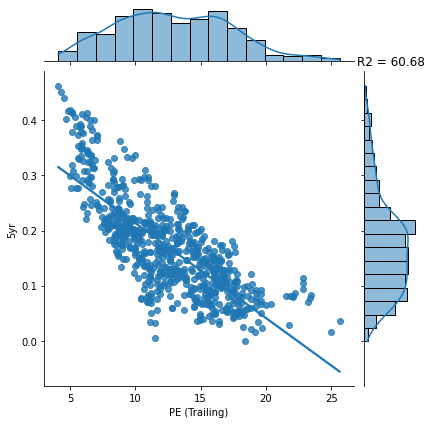

In [196]:
y = '5yr'

sns.jointplot(x='PE (Trailing)', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_trailing[y].values[0],2)))
plt.show()

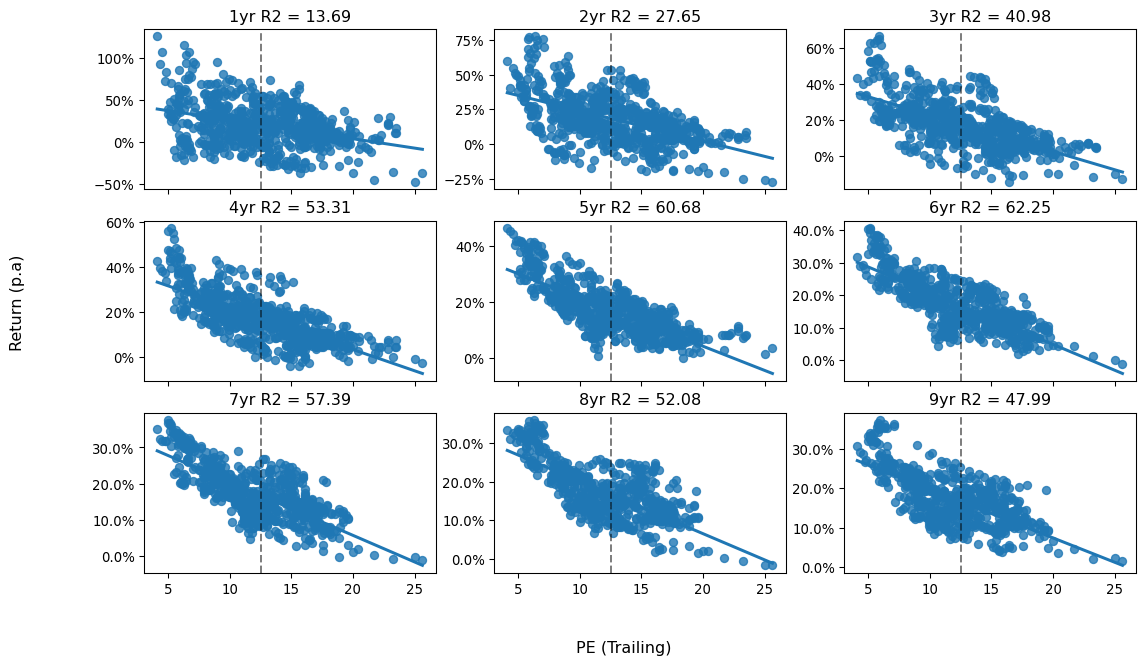

In [197]:
#Plotting Simple Linear Regressions for Trailing PE and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'PE (Trailing)'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_trailing['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_trailing['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_trailing['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_trailing['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_trailing['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_trailing['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_trailing['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_trailing['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_trailing['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')

plt.show()

## Forward PE Regression

In [198]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['PE (1yr Forward)', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_forward = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_forward = r_squared_forward * 100
r_squared_forward

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,12.255059,21.605657,33.766968,47.022263,46.116902,51.996495,40.511079,9.950278,8.154577,8.766799


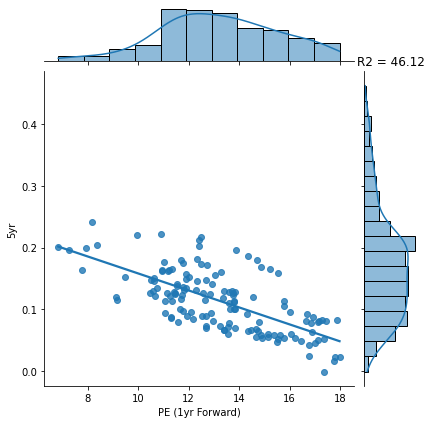

In [199]:
y = '5yr'

sns.jointplot(x='PE (1yr Forward)', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_forward[y].values[0],2)))
plt.show()

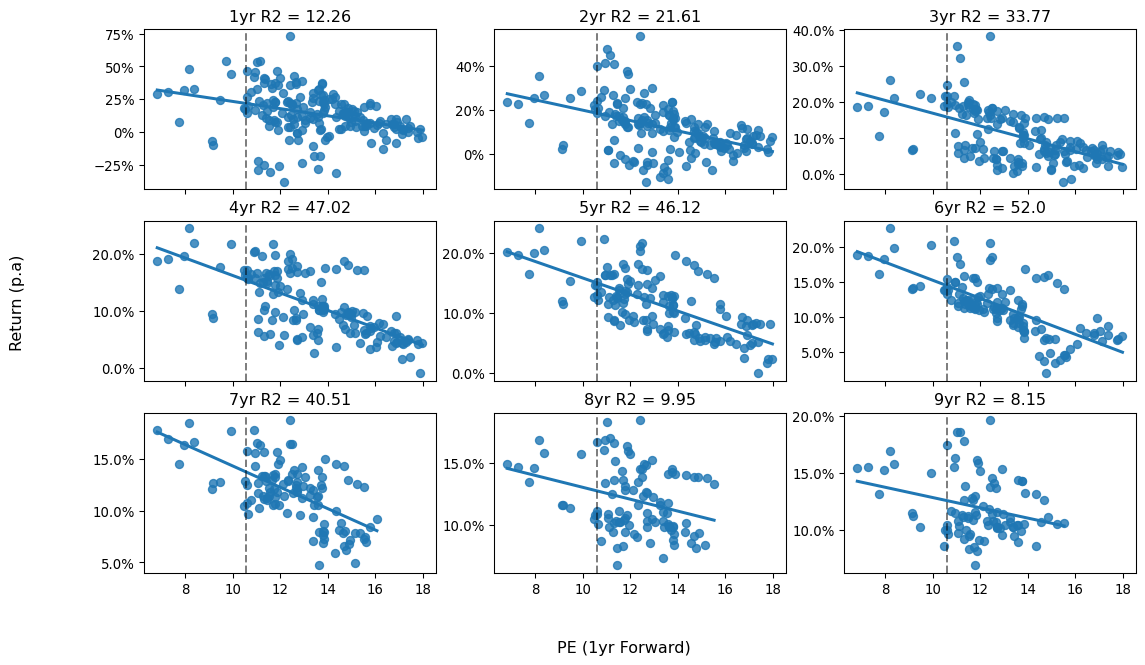

In [200]:
#Plotting Simple Linear Regressions for Forward PE and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'PE (1yr Forward)'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_forward['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_forward['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_forward['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_forward['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_forward['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_forward['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_forward['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_forward['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_forward['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## CAPE Regression

In [201]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['CAPE', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_cape = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_cape = r_squared_cape * 100
r_squared_cape

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,14.54864,26.661845,34.876789,38.330674,37.446989,34.396012,34.931429,37.697943,39.941918,38.921616


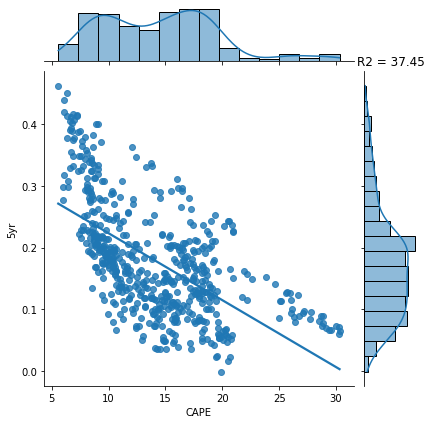

In [202]:
y = '5yr'

sns.jointplot(x='CAPE', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_cape[y].values[0],2)))
plt.show()

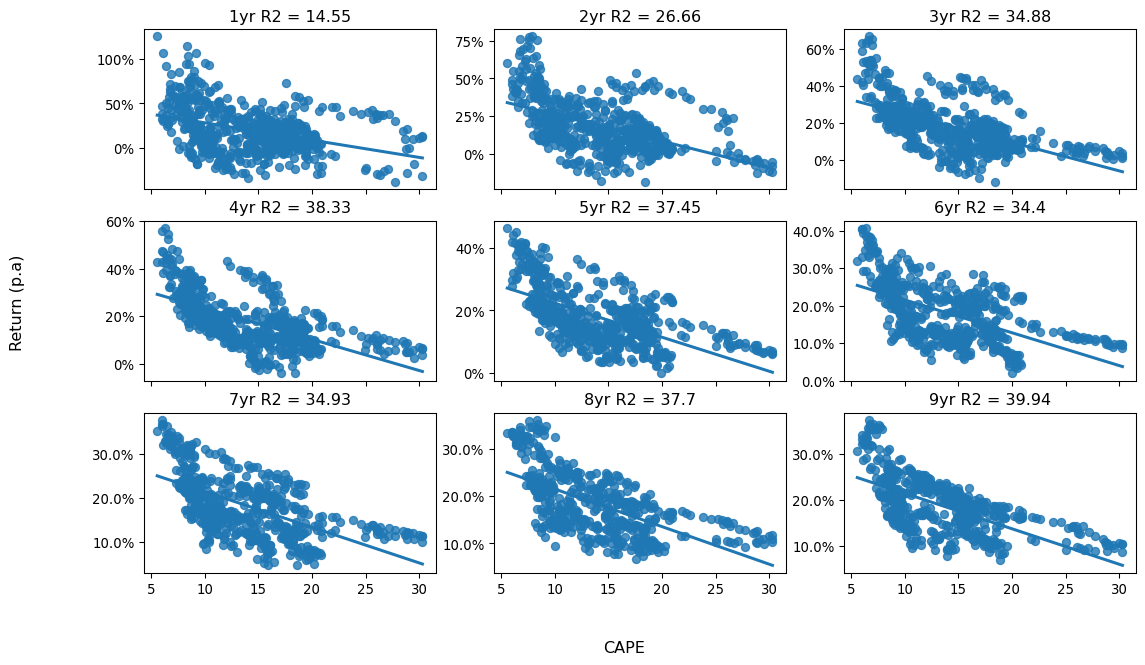

In [203]:
#Plotting Simple Linear Regressions for CAPE and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'CAPE'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_cape['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_cape['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_cape['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_cape['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_cape['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_cape['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_cape['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_cape['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_cape['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Price-to-Book Regression

In [204]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['P/B', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_pb = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_pb = r_squared_pb * 100
r_squared_pb

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,9.91573,14.106442,22.997568,24.785555,30.741671,31.77271,27.721235,26.43105,24.249862,17.595149


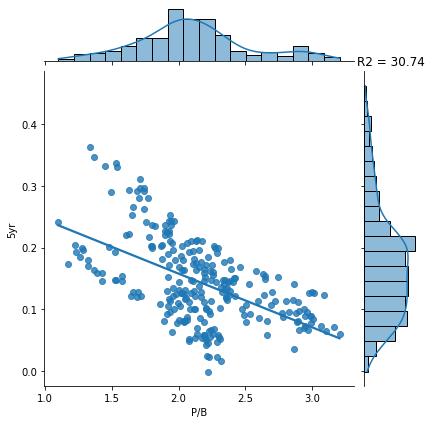

In [205]:
y = '5yr'

sns.jointplot(x='P/B', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_pb[y].values[0],2)))
plt.show()

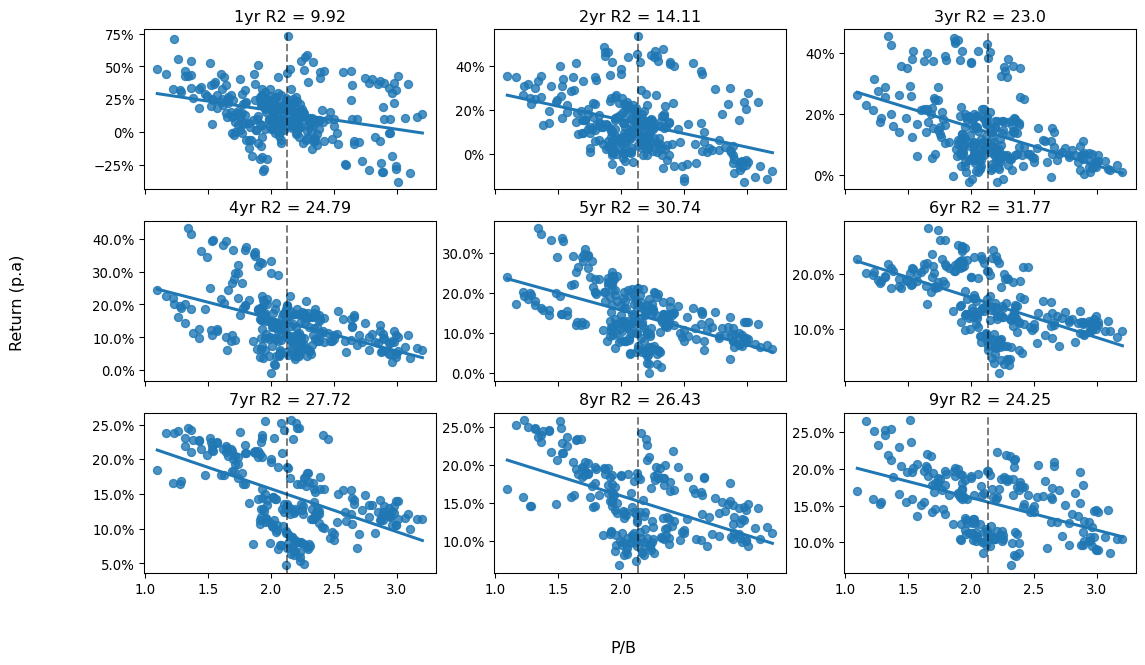

In [206]:
#Plotting Simple Linear Regressions for Price-to-Book and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'P/B'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_pb['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_pb['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_pb['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_pb['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_pb['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_pb['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_pb['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_pb['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_pb['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Price-to-Sales Regression

In [207]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['P/Sales', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_ps = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_ps = r_squared_ps * 100
r_squared_ps

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,26.025756,31.885373,48.665184,61.054111,71.228653,57.947621,46.073517,44.978635,54.36424,50.093337


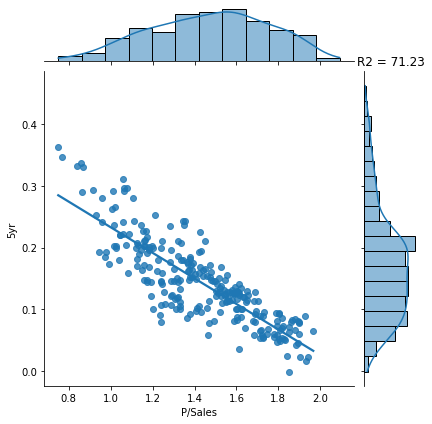

In [208]:
y = '5yr'

sns.jointplot(x='P/Sales', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_ps[y].values[0],2)))
plt.show()

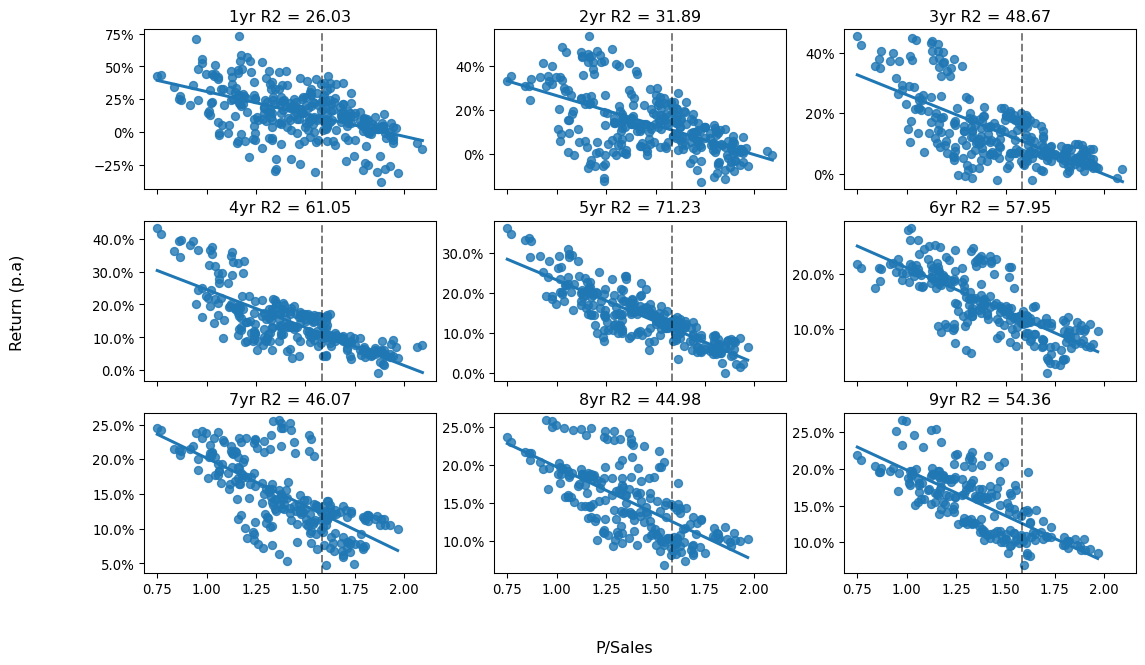

In [209]:
#Plotting Simple Linear Regressions for Price-to-Sales and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'P/Sales'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_ps['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_ps['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_ps['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_ps['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_ps['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_ps['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_ps['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_ps['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_ps['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## EV/EBITDA Regression

In [210]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['EV/EBITDA', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_ev = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_ev = r_squared_ev * 100
r_squared_ev

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,14.239554,23.213281,48.93647,56.709279,49.904181,58.124654,39.625319,6.146566,5.733503,7.095704


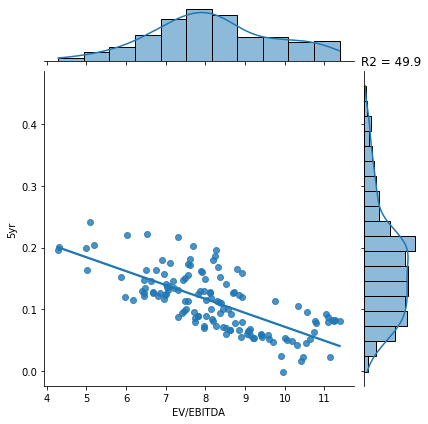

In [211]:
y = '5yr'

sns.jointplot(x='EV/EBITDA', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_ev[y].values[0],2)))
plt.show()

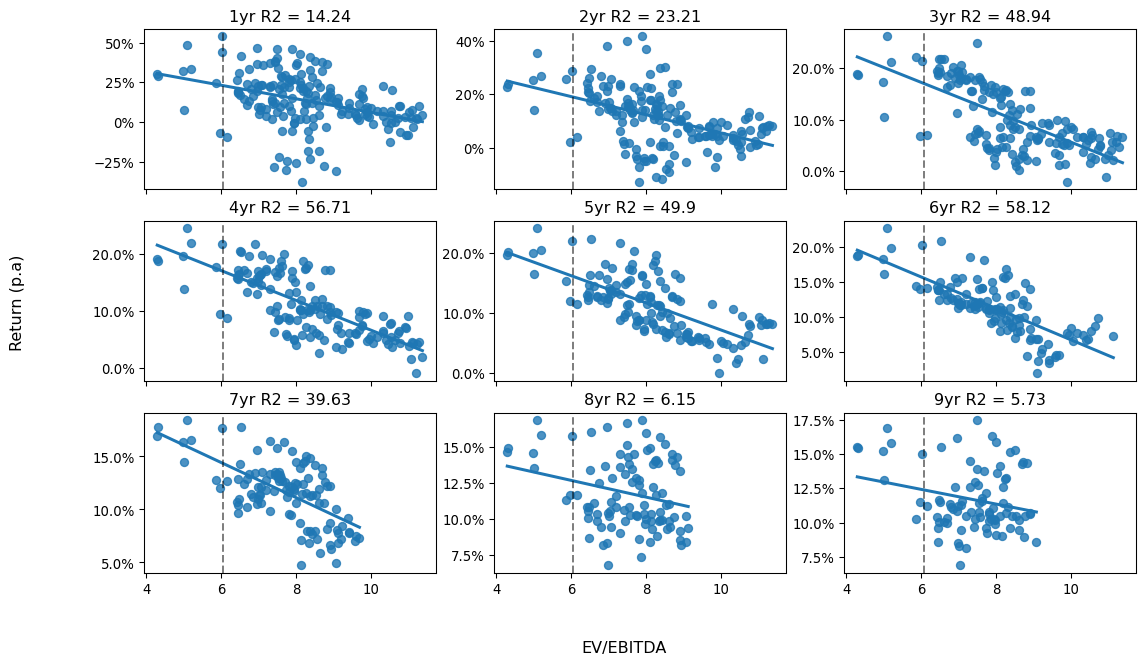

In [212]:
#Plotting Simple Linear Regressions for EV/EBITDA and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'EV/EBITDA'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_ev['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_ev['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_ev['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_ev['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_ev['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_ev['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_ev['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_ev['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_ev['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Trailing Dividend Yield Regression

In [213]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['DY (Trailing)', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_dy = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_dy = r_squared_dy * 100
r_squared_dy

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,8.535726,19.051447,28.736272,39.202556,46.049203,44.822239,42.32533,43.227065,39.666615,36.157904


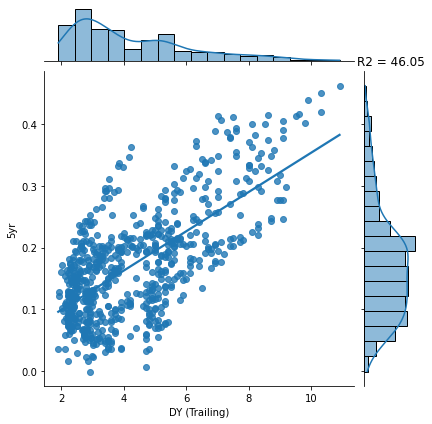

In [214]:
y = '5yr'

sns.jointplot(x='DY (Trailing)', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_dy[y].values[0],2)))
plt.show()

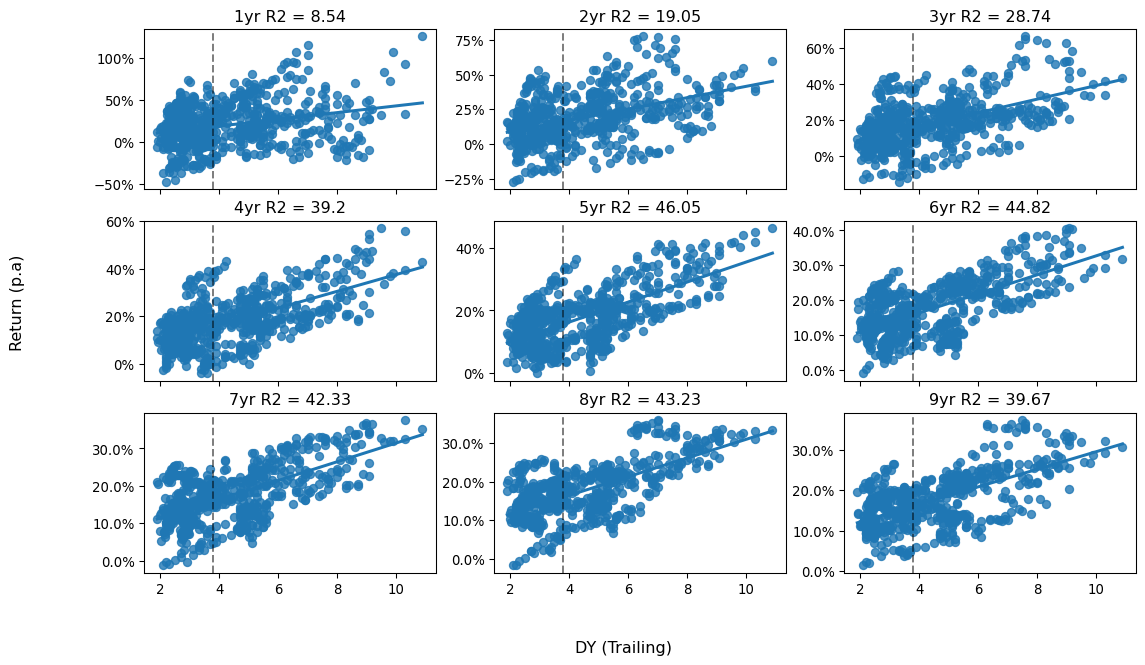

In [215]:
#Plotting Simple Linear Regressions for Trailing DY and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'DY (Trailing)'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_dy['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_dy['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_dy['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_dy['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_dy['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_dy['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_dy['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_dy['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_dy['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Forward Dividend Yield Regression

In [216]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['DY (1yr Forward)', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_dy1 = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_dy1 = r_squared_dy1 * 100
r_squared_dy1

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,8.254826,2.209104,0.495711,0.993827,1.31225,5.827055,10.307158,12.544955,24.29824,21.309637


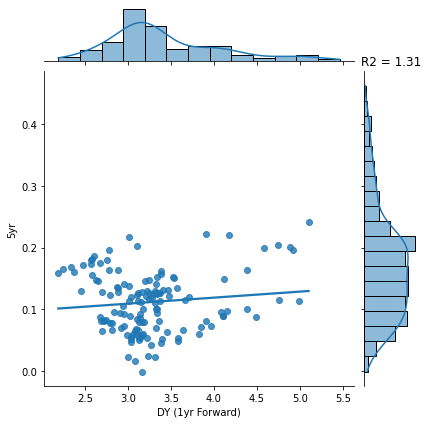

In [217]:
y = '5yr'

sns.jointplot(x='DY (1yr Forward)', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_dy1[y].values[0],2)))
plt.show()

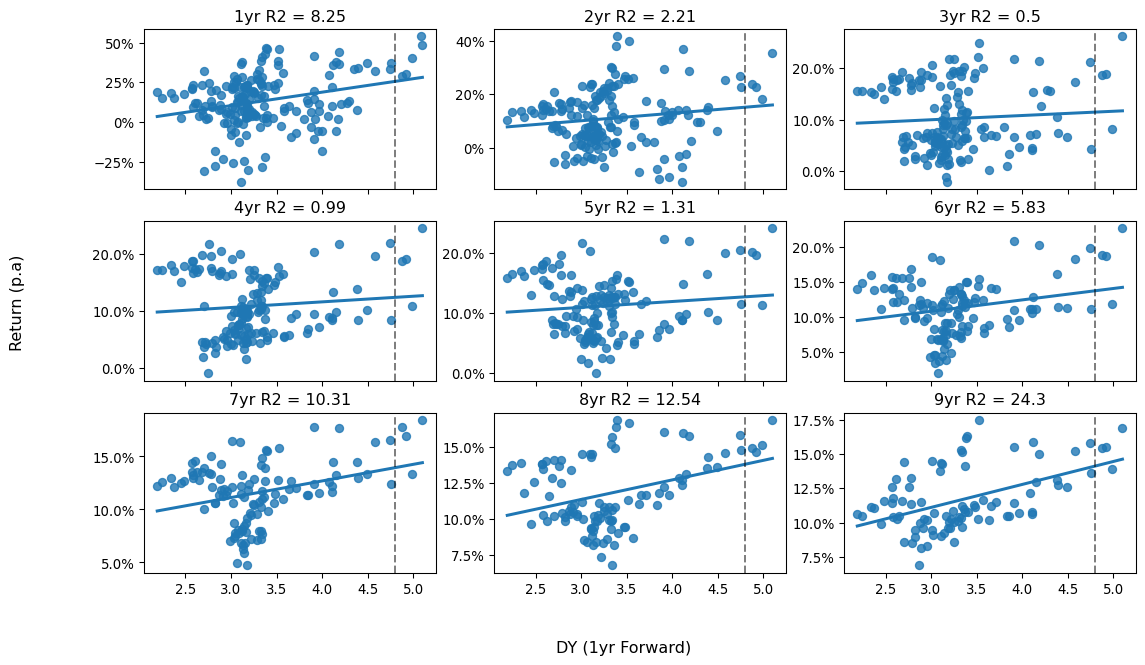

In [218]:
#Plotting Simple Linear Regressions for Forward DY and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'DY (1yr Forward)'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_dy1['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_dy1['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_dy1['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_dy1['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_dy1['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_dy1['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_dy1['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_dy1['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_dy1['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Free Cash Flow Yield Regression

In [219]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['FCF Yield', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_fcf = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_fcf = r_squared_fcf * 100
r_squared_fcf

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,17.129825,9.856692,9.879095,5.817516,4.496084,6.546214,11.100711,5.675065,1.988196,0.361927


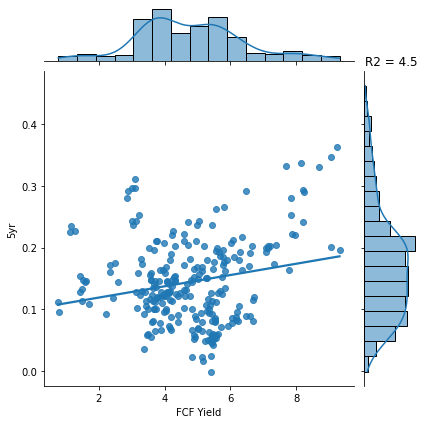

In [220]:
y = '5yr'

sns.jointplot(x='FCF Yield', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_fcf[y].values[0],2)))
plt.show()

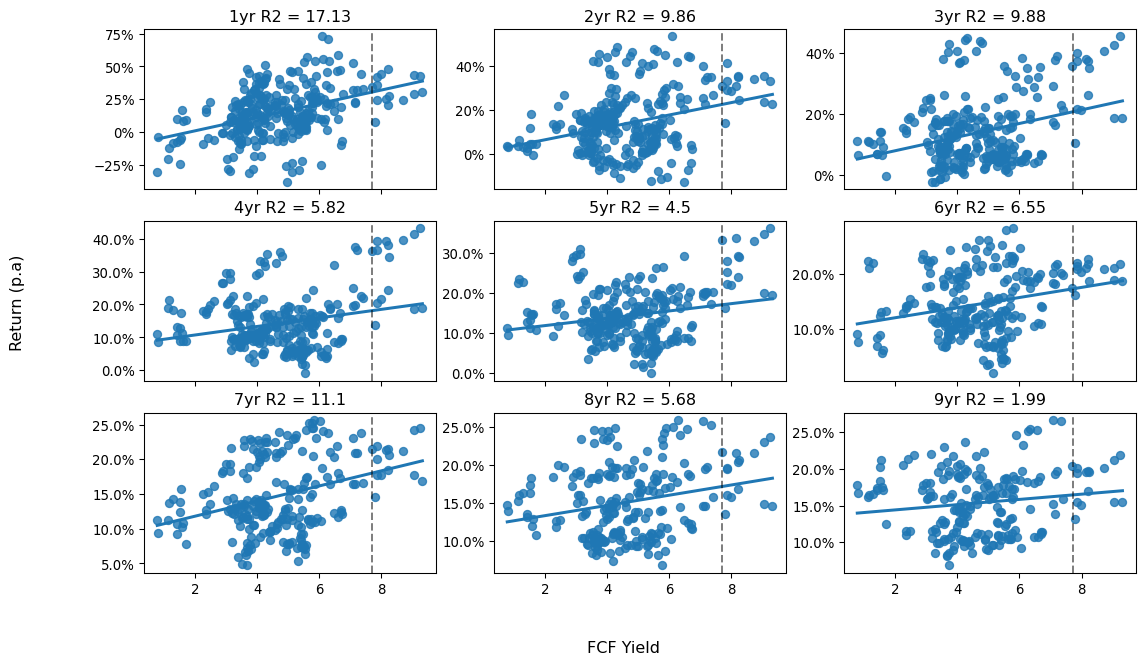

In [221]:
#Plotting Simple Linear Regressions for Free Cash Flow Yield and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'FCF Yield'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_fcf['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_fcf['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_fcf['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_fcf['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_fcf['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_fcf['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_fcf['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_fcf['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_fcf['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Net Debt/EBITDA Regression

In [222]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['ND/EBITDA', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_nd = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_nd = r_squared_nd * 100
r_squared_nd

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,0.389823,1.479964,2.599791,4.019937,2.685846,11.969938,17.402242,36.371462,27.743218,24.054729


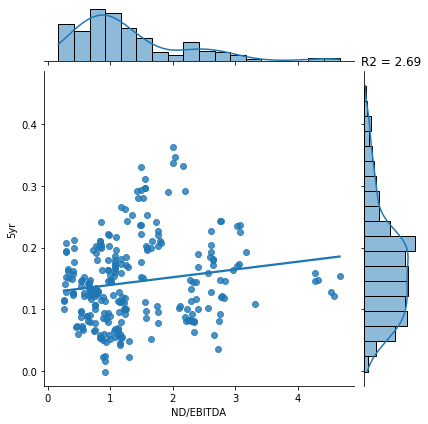

In [223]:
y = '5yr'

sns.jointplot(x='ND/EBITDA', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_nd[y].values[0],2)))
plt.show()

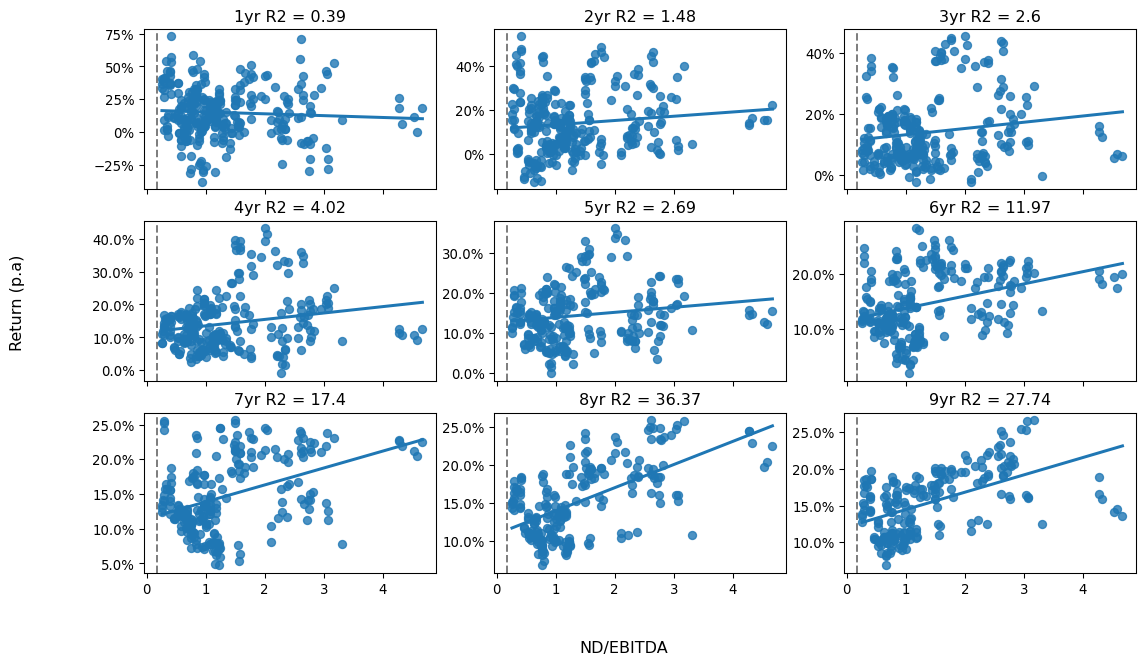

In [224]:
#Plotting Simple Linear Regressions for Net Debt/EBITDA and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'ND/EBITDA'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_nd['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_nd['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_nd['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_nd['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_nd['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_nd['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_nd['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_nd['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_nd['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## Return on Equity Regression

In [225]:
#Calculate the R-Squared for each subsequent time period

time_periods = [str(x) + suffix for x in periods]

test = []

for x in range(len(time_periods)):
    calc_df = df[['ROE', time_periods[x]]].dropna()
    r2 = stats.pearsonr(calc_df[calc_df.columns[0]], calc_df[calc_df.columns[1]])[0] ** 2
    test.append(r2)

r_squared_roe = pd.DataFrame(test, index=time_periods, columns=['R2']).transpose()
r_squared_roe = r_squared_roe * 100
r_squared_roe

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
R2,0.729116,1.096352,0.057144,1.485376,1.728679,0.689489,0.214119,2.744158,11.038111,16.226488


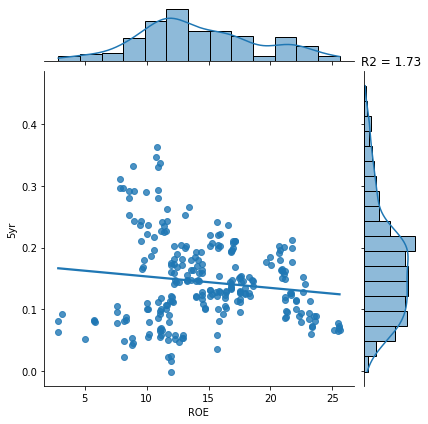

In [226]:
y = '5yr'

sns.jointplot(x='ROE', y=y, data=df, kind='reg', ci=None)
plt.title('R2 = ' + str(round(r_squared_roe[y].values[0],2)))
plt.show()

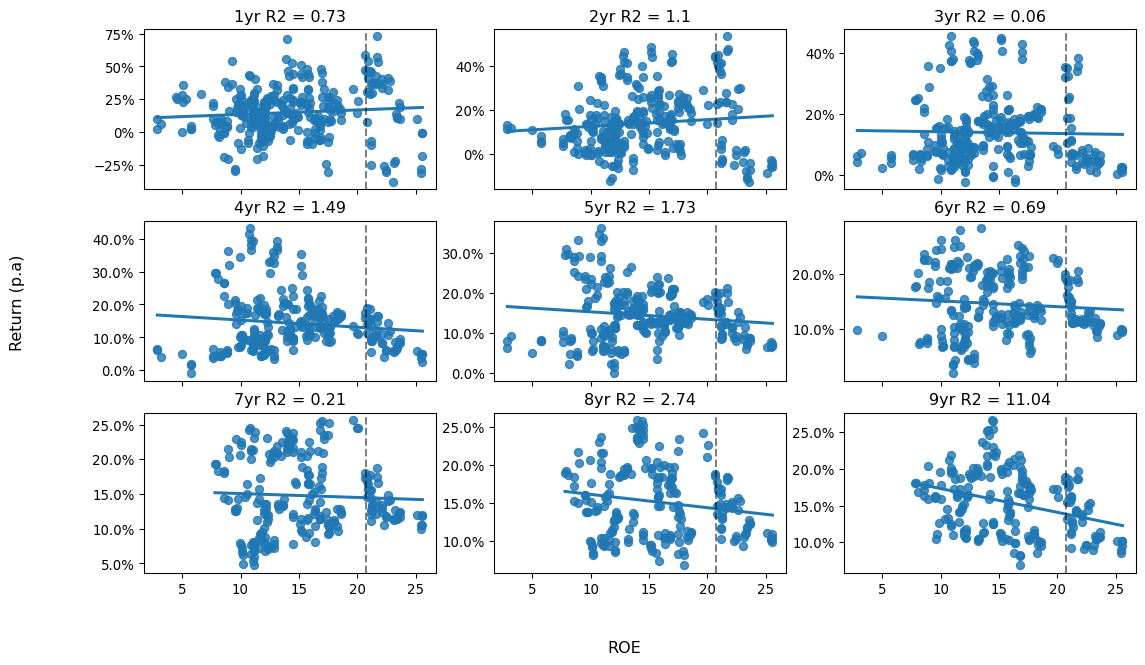

In [227]:
#Plotting Simple Linear Regressions for ROE and Subsequent x-year Total Return
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13.33,7.5), dpi=96)

x = 'ROE'
data = df
latest = df[x][-1]

axs[0,0] = sns.regplot(x=x, y='1yr', data=data, ci=None, ax=axs[0,0])
axs[0,0].set_title('1yr R2 = ' + str(round(r_squared_roe['1yr'].values[0],2)))
axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,0].set(xlabel=None, ylabel=None)

axs[0,1] = sns.regplot(x=x, y='2yr', data=data, ci=None, ax=axs[0,1])
axs[0,1].set_title('2yr R2 = ' + str(round(r_squared_roe['2yr'].values[0],2)))
axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,1].set(xlabel=None, ylabel=None)

axs[0,2] = sns.regplot(x=x, y='3yr', data=data, ci=None, ax=axs[0,2])
axs[0,2].set_title('3yr R2 = ' + str(round(r_squared_roe['3yr'].values[0],2)))
axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[0,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[0,2].set(xlabel=None, ylabel=None)

axs[1,0] = sns.regplot(x=x, y='4yr', data=data, ci=None, ax=axs[1,0])
axs[1,0].set_title('4yr R2 = ' + str(round(r_squared_roe['4yr'].values[0],2)))
axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,0].set(xlabel=None, ylabel=None)

axs[1,1] = sns.regplot(x=x, y='5yr', data=data, ci=None, ax=axs[1,1])
axs[1,1].set_title('5yr R2 = ' + str(round(r_squared_roe['5yr'].values[0],2)))
axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,1].set(xlabel=None, ylabel=None)

axs[1,2] = sns.regplot(x=x, y='6yr', data=data, ci=None, ax=axs[1,2])
axs[1,2].set_title('6yr R2 = ' + str(round(r_squared_roe['6yr'].values[0],2)))
axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[1,2].set(xlabel=None, ylabel=None)

axs[2,0] = sns.regplot(x=x, y='7yr', data=data, ci=None, ax=axs[2,0])
axs[2,0].set_title('7yr R2 = ' + str(round(r_squared_roe['7yr'].values[0],2)))
axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,0].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,0].set(xlabel=None, ylabel=None)

axs[2,1] = sns.regplot(x=x, y='8yr', data=data, ci=None, ax=axs[2,1])
axs[2,1].set_title('8yr R2 = ' + str(round(r_squared_roe['8yr'].values[0],2)))
axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,1].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,1].set(xlabel=None, ylabel=None)

axs[2,2] = sns.regplot(x=x, y='9yr', data=data, ci=None, ax=axs[2,2])
axs[2,2].set_title('9yr R2 = ' + str(round(r_squared_roe['9yr'].values[0],2)))
axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2,2].axvline(latest, color='black', linestyle='--', alpha=0.5)
axs[2,2].set(xlabel=None, ylabel=None)

fig.supxlabel(x)
fig.supylabel('Return (p.a)')
plt.show()

## R-Squared Summaries

In [228]:
summary = pd.DataFrame()

dfs = [r_squared_trailing, r_squared_forward, r_squared_cape, r_squared_pb, r_squared_ps, r_squared_ev, r_squared_dy, r_squared_dy1, 
       r_squared_fcf, r_squared_nd, r_squared_roe]

cols = df.columns[0:11]

for i in dfs:
    summary = summary.append(i)
    
summary.index = cols
summary

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr
PE (Trailing),13.687636,27.654136,40.980187,53.308327,60.676395,62.254006,57.392076,52.077741,47.990360,39.897674
PE (1yr Forward),12.255059,21.605657,33.766968,47.022263,46.116902,51.996495,40.511079,9.950278,8.154577,8.766799
CAPE,14.548640,26.661845,34.876789,38.330674,37.446989,34.396012,34.931429,37.697943,39.941918,38.921616
P/B,9.915730,14.106442,22.997568,24.785555,30.741671,31.772710,27.721235,26.431050,24.249862,17.595149
P/Sales,26.025756,31.885373,48.665184,61.054111,71.228653,57.947621,46.073517,44.978635,54.364240,50.093337
EV/EBITDA,14.239554,23.213281,48.936470,56.709279,49.904181,58.124654,39.625319,6.146566,5.733503,7.095704
DY (Trailing),8.535726,19.051447,28.736272,39.202556,46.049203,44.822239,42.325330,43.227065,39.666615,36.157904
DY (1yr Forward),8.254826,2.209104,0.495711,0.993827,1.312250,5.827055,10.307158,12.544955,24.298240,21.309637
FCF Yield,17.129825,9.856692,9.879095,5.817516,4.496084,6.546214,11.100711,5.675065,1.988196,0.361927
ND/EBITDA,0.389823,1.479964,2.599791,4.019937,2.685846,11.969938,17.402242,36.371462,27.743218,24.054729


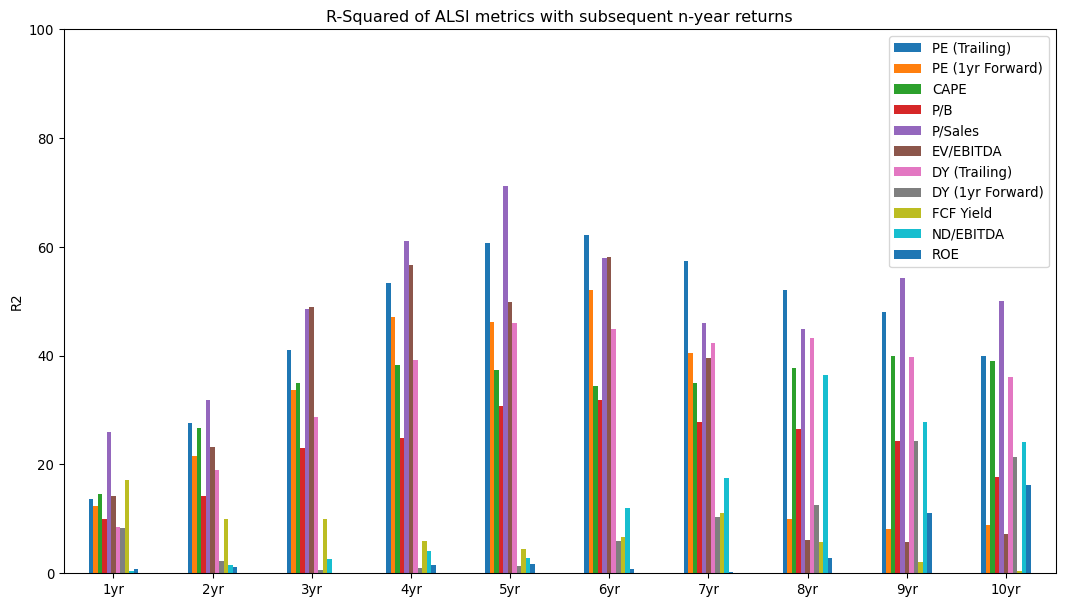

In [229]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=96)

ax = summary.transpose().plot(kind='bar', ax=ax)

ax.set_ylim(top=100)
plt.title('R-Squared of ALSI metrics with subsequent n-year returns')
plt.ylabel('R2')
plt.xticks(rotation=0)

plt.show()

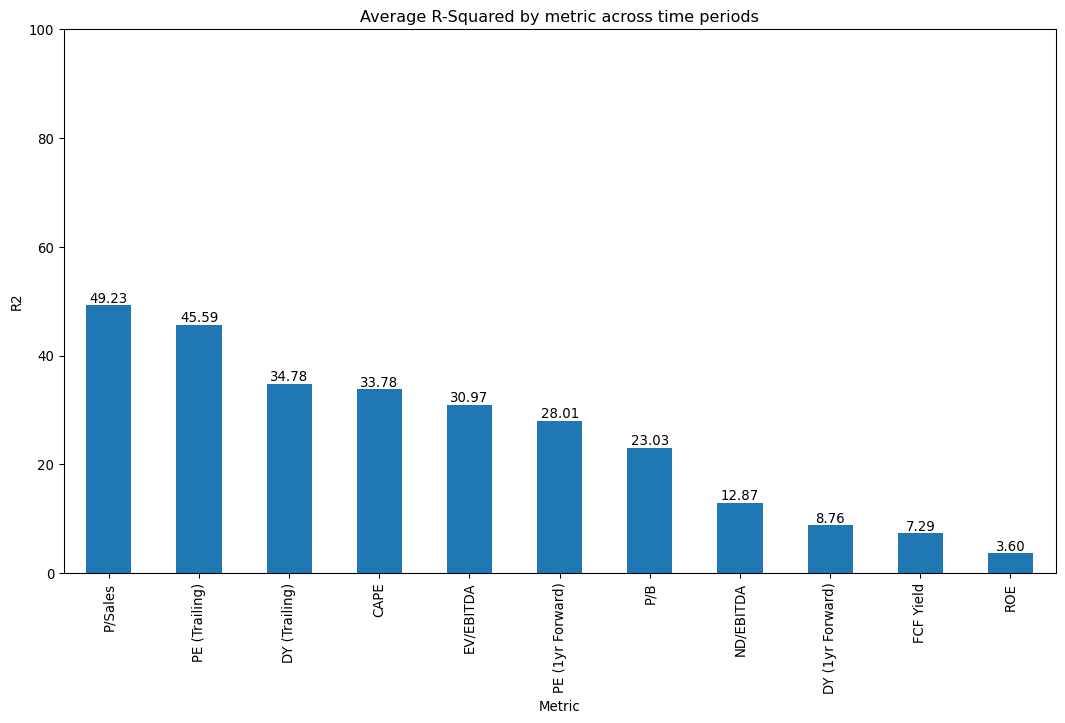

In [230]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=96)

ax = summary.transpose().mean().sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylim(top=100)
plt.title('Average R-Squared by metric across time periods')
plt.xlabel('Metric')
plt.ylabel('R2')
#plt.xticks(rotation=0)
label = summary.transpose().mean().sort_values(ascending=False).round(2)

for i in range(len(label)):
    ax.text(x = i, y = label[i], s="{:.2f}".format(label[i]), color = 'black', va='bottom', ha='center')

plt.show()

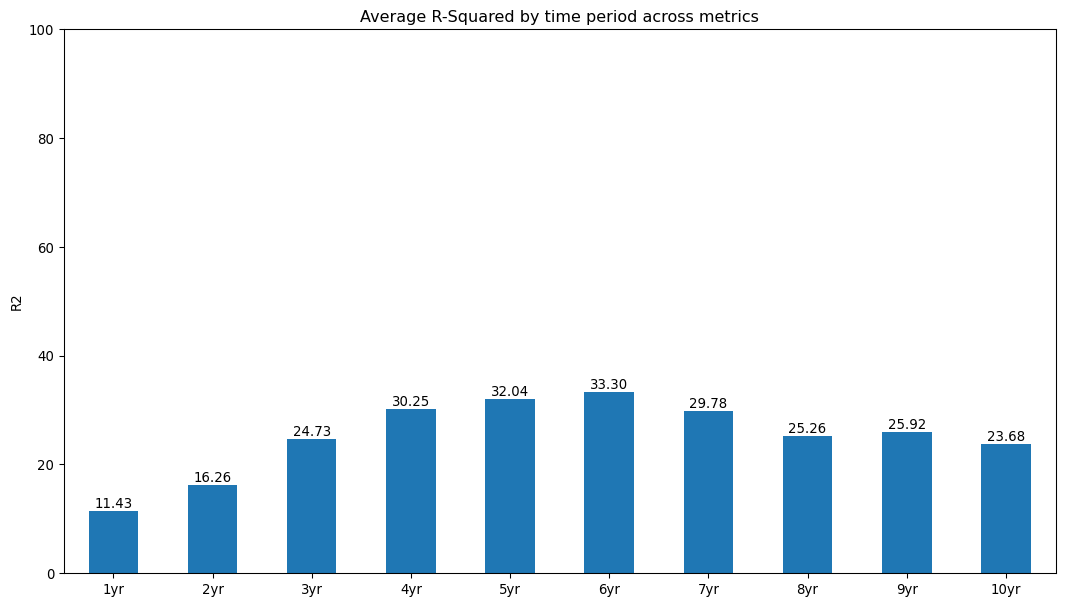

In [231]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=96)

ax = summary.mean().plot(kind='bar', ax=ax)

ax.set_ylim(top=100)
plt.title('Average R-Squared by time period across metrics')
plt.ylabel('R2')
plt.xticks(rotation=0)

label = summary.mean().round(2)

for i in range(len(label)):
    ax.text(x = i, y = label[i], s="{:.2f}".format(label[i]), color = 'black', va='bottom', ha='center')

plt.show()